In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [155]:
train = pd.read_csv("train.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])
test = pd.read_csv("test.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])

submission = pd.read_csv("sample_submission.csv")

In [156]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [157]:
train.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [158]:
import datetime

train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])

now = datetime.datetime.now()
train['Age'] = ((now - train['Date.of.Birth'])/365).dt.days



In [159]:
delta = (now - train['DisbursalDate'])
train['Days_Since_Disbursal'] = delta.dt.days

In [160]:
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

train['CREDIT.HISTORY.LENGTH_total_months'] = (train['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + train['CREDIT.HISTORY.LENGTH_mon'].astype(int)
train = train.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [161]:

train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

train['AVERAGE.ACCT.AGE_total_months'] = (train['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + train['AVERAGE.ACCT.AGE_mon'].astype(int)

train = train.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)


In [162]:
## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [163]:
train['branch_id'] = train['branch_id'].astype('category')
train['manufacturer_id'] = train['manufacturer_id'].astype('category')
train['State_ID'] = train['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['branch_id'] = le.fit_transform(train['branch_id'])
train['manufacturer_id'] = le.fit_transform(train['manufacturer_id'])
train['State_ID'] = le.fit_transform(train['State_ID'])


In [164]:
train['PRI.CURRENT.BALANCE'].fillna(train['PRI.CURRENT.BALANCE'].mean(), inplace = True)
train['PRI.SANCTIONED.AMOUNT'].fillna(train['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
train['SEC.CURRENT.BALANCE'].fillna(train['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [165]:
train['PERFORM_CNS.SCORE'] = np.log1p(train['PERFORM_CNS.SCORE'])
train['disbursed_amount'] = np.log1p(train['disbursed_amount'])
train['asset_cost'] = np.log1p(train['asset_cost'])
train['ltv'] = np.log1p(train['ltv'])
train['PRIMARY.INSTAL.AMT'] = np.log1p(train['PRIMARY.INSTAL.AMT'])
train['SEC.INSTAL.AMT'] = np.log1p(train['SEC.INSTAL.AMT'])
train['SEC.NO.OF.ACCTS'] = np.log1p(train['SEC.NO.OF.ACCTS'])
train['SEC.ACTIVE.ACCTS'] = np.log1p(train['SEC.ACTIVE.ACCTS'])
train['SEC.OVERDUE.ACCTS'] = np.log1p(train['SEC.OVERDUE.ACCTS'])
train['SEC.SANCTIONED.AMOUNT'] = np.log1p(train['SEC.SANCTIONED.AMOUNT'])
train['SEC.DISBURSED.AMOUNT'] = np.log1p(train['SEC.DISBURSED.AMOUNT'])
#train['SEC.CURRENT.BALANCE'] = np.log1p(train['SEC.CURRENT.BALANCE'])
train['PRI.NO.OF.ACCTS'] = np.log1p(train['PRI.NO.OF.ACCTS'])
train['PRI.ACTIVE.ACCTS'] = np.log1p(train['PRI.ACTIVE.ACCTS'])
train['PRI.OVERDUE.ACCTS'] = np.log1p(train['PRI.OVERDUE.ACCTS'])
#train['PRI.CURRENT.BALANCE'] = np.log1p(train['PRI.CURRENT.BALANCE'])
#train['PRI.SANCTIONED.AMOUNT'] = np.log1p(train['PRI.SANCTIONED.AMOUNT'])
train['PRI.DISBURSED.AMOUNT'] = np.log1p(train['PRI.DISBURSED.AMOUNT'])



9839 112392


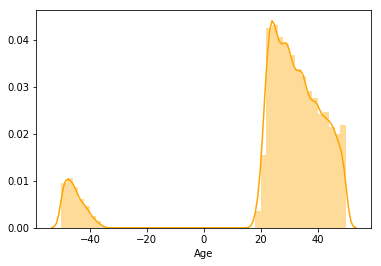

In [166]:
##Date.of.Birth - derive Age from this and drop this 

test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'])

now = datetime.datetime.now()
test['Age'] = ((now - test['Date.of.Birth'])/365).dt.days

sns.distplot(test['Age'],  color = 'orange')

print(len(test[test['Age'] <= 0]), len(test))

0    405
1    151
2    142
Name: Days_Since_Disbursal, dtype: int64


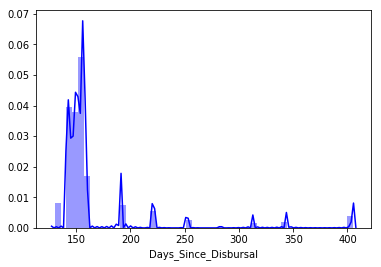

In [167]:
##DisbursalDate - derive days elapsed since loan disbursal

test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])
delta = (now - test['DisbursalDate'])
test['Days_Since_Disbursal'] = delta.dt.days

print(test['Days_Since_Disbursal'][:3])

sns.distplot(test['Days_Since_Disbursal'], color='blue')


In [168]:
##PERFORM_CNS.SCORE.DESCRIPTION - label encode categorical data

test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    63017
5    24993
4     8070
3     5990
2     5642
1     4680
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [169]:
##AVERAGE.ACCT.AGE - extract the #yrs and #months as total # months

test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

test['AVERAGE.ACCT.AGE_total_months'] = (test['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + test['AVERAGE.ACCT.AGE_mon'].astype(int)

test = test.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)



In [170]:
##CREDIT.HISTORY.LENGTH  - extract the #yrs and #months as total # months

test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

test['CREDIT.HISTORY.LENGTH_total_months'] = (test['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + test['CREDIT.HISTORY.LENGTH_mon'].astype(int)
test = test.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [171]:
##branch_id  - convert to category and label encode
test['branch_id'] = test['branch_id'].astype('category')
le = LabelEncoder()
test['branch_id'] = le.fit_transform(test['branch_id'])

##manufacturer_id  - convert to category and label encode
test['manufacturer_id'] = test['manufacturer_id'].astype('category')
test['manufacturer_id'] = le.fit_transform(test['manufacturer_id'])

##State_ID - convert to category and label encode
test['State_ID'] = test['State_ID'].astype('category')
test['State_ID'] = le.fit_transform(test['State_ID'])


In [172]:

test['PRI.CURRENT.BALANCE'].fillna(test['PRI.CURRENT.BALANCE'].mean(), inplace = True)
test['PRI.SANCTIONED.AMOUNT'].fillna(test['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
test['SEC.CURRENT.BALANCE'].fillna(test['SEC.CURRENT.BALANCE'].mean(), inplace = True)


In [173]:
## Log transform:
'''
PERFORM_CNS.SCORE
disbursed_amount
asset_cost
ltv
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
SEC.CURRENT.BALANCE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
'''

test['PERFORM_CNS.SCORE'] = np.log1p(test['PERFORM_CNS.SCORE'])
test['disbursed_amount'] = np.log1p(test['disbursed_amount'])
test['asset_cost'] = np.log1p(test['asset_cost'])
test['ltv'] = np.log1p(test['ltv'])
test['PRIMARY.INSTAL.AMT'] = np.log1p(test['PRIMARY.INSTAL.AMT'])
test['SEC.INSTAL.AMT'] = np.log1p(test['SEC.INSTAL.AMT'])
test['SEC.NO.OF.ACCTS'] = np.log1p(test['SEC.NO.OF.ACCTS'])
test['SEC.ACTIVE.ACCTS'] = np.log1p(test['SEC.ACTIVE.ACCTS'])
test['SEC.OVERDUE.ACCTS'] = np.log1p(test['SEC.OVERDUE.ACCTS'])
test['SEC.SANCTIONED.AMOUNT'] = np.log1p(test['SEC.SANCTIONED.AMOUNT'])
test['SEC.DISBURSED.AMOUNT'] = np.log1p(test['SEC.DISBURSED.AMOUNT'])
#test['SEC.CURRENT.BALANCE'] = np.log1p(test['SEC.CURRENT.BALANCE'])
test['PRI.NO.OF.ACCTS'] = np.log1p(test['PRI.NO.OF.ACCTS'])
test['PRI.ACTIVE.ACCTS'] = np.log1p(test['PRI.ACTIVE.ACCTS'])
test['PRI.OVERDUE.ACCTS'] = np.log1p(test['PRI.OVERDUE.ACCTS'])
#test['PRI.CURRENT.BALANCE'] = np.log1p(test['PRI.CURRENT.BALANCE'])
#test['PRI.SANCTIONED.AMOUNT'] = np.log1p(test['PRI.SANCTIONED.AMOUNT'])
test['PRI.DISBURSED.AMOUNT'] = np.log1p(test['PRI.DISBURSED.AMOUNT'])




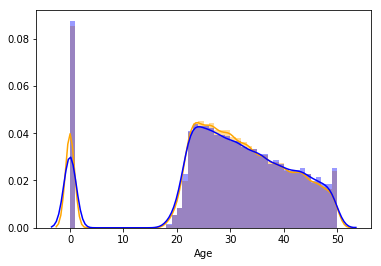

In [174]:
train.loc[train['Age'] <= 0, 'Age'] = 0
test.loc[test['Age'] <= 0, 'Age'] = 0

sns.distplot(train['Age'], color='orange')
sns.distplot(test['Age'], color='blue')

In [175]:
### Impute Employment.Type
train['Employment.Type'] = train['Employment.Type'].replace(('Self employed', 'Salaried'), (0, 1))

emp = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis=1)


In [176]:
## split into train and test sets
train_emp = emp[emp['Employment.Type'].notnull()]
y_train_emp = train_emp['Employment.Type'].astype(int)

train_emp_ld = train_emp['loan_default'].astype(int)
train_emp = train_emp.drop(['Employment.Type', 'loan_default'], axis=1)

test_emp = emp[emp['Employment.Type'].isnull()]
test_emp_ld = test_emp['loan_default'].astype(int)
test_emp = test_emp.drop(['Employment.Type', 'loan_default'], axis=1)



In [177]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_emp = sc.fit_transform(train_emp)
test_emp = sc.transform(test_emp)

train_emp = pd.DataFrame(train_emp)
test_emp = pd.DataFrame(test_emp)

train_emp['loan_default'] = train_emp_ld.values
test_emp['loan_default'] = test_emp_ld.values



In [178]:
from lightgbm import LGBMClassifier

model_emp = LGBMClassifier()

model_emp.fit(train_emp, y_train_emp)

y_test_emp_pred = model_emp.predict(test_emp)


In [179]:

train_emp['Employment.Type'] = y_train_emp.values
test_emp['Employment.Type'] = y_test_emp_pred

train_emp_imputed = pd.concat([train_emp, test_emp], axis=0)



In [180]:
## Model based Imputation for the Employment.Type column for the test data set
test['Employment.Type'] = test['Employment.Type'].replace(('Self employed', 'Salaried'), (0, 1))

emp = test.drop(['supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis=1)

## split into train and test sets
test_train_emp = emp[emp['Employment.Type'].notnull()]
test_y_train_emp = test_train_emp['Employment.Type']
test_uniqueid_1 = test_train_emp['UniqueID']
test_train_emp = test_train_emp.drop(['Employment.Type', 'UniqueID'], axis=1)

test_test_emp = emp[emp['Employment.Type'].isnull()]
test_uniqueid_2 = test_test_emp['UniqueID']
test_test_emp = test_test_emp.drop(['Employment.Type', 'UniqueID'], axis=1)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_train_emp = sc.fit_transform(test_train_emp)
test_test_emp = sc.transform(test_test_emp)

test_train_emp = pd.DataFrame(test_train_emp)
test_test_emp = pd.DataFrame(test_test_emp)


from lightgbm import LGBMClassifier

test_model_emp = LGBMClassifier()

test_model_emp.fit(test_train_emp, test_y_train_emp)

test_y_test_emp_pred = test_model_emp.predict(test_test_emp)

test_train_emp = pd.DataFrame(test_train_emp)
test_test_emp = pd.DataFrame(test_test_emp)
test_train_emp['Employment.Type'] = test_y_train_emp.values
test_test_emp['Employment.Type'] = test_y_test_emp_pred

test_emp_imputed = pd.concat([test_train_emp, test_test_emp], axis=0)


In [181]:
## remove attributes : UniqueID, supplier_id, Current_pincode_ID, Employee_code_ID, Date.of.Birth, DisbursalDate

y_train = train_emp_imputed['loan_default']
train_emp_imputed = train_emp_imputed.drop(['loan_default'], axis=1)
unique_id = test_uniqueid_1
unique_id = unique_id.append(test_uniqueid_2, ignore_index=True)

#train = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age', 'loan_default'], axis = 1)

#test = test.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age'], axis = 1)




In [182]:
## Class Imbalance

y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [183]:


sc = StandardScaler()

train_emp_imputed[['Employment.Type']] = sc.fit_transform(train_emp_imputed[['Employment.Type']])
test_emp_imputed[['Employment.Type']] = sc.transform(test_emp_imputed[['Employment.Type']])



In [184]:
## Oversampling the minority class (1) SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(train_emp_imputed, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 36)
Shape of y: (365086,)


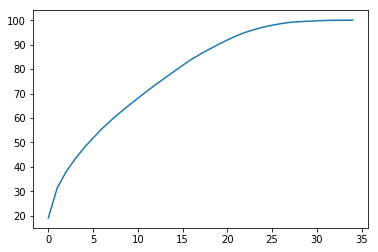

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)

pca.fit(x_resample)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [186]:
# let us take 27 components
pca = PCA(n_components=27)

pca.fit(x_resample)

#transform training and test data onto the principal axes
pca_x_train = pca.transform(x_resample)
pca_x_test = pca.transform(test_emp_imputed)

In [187]:
## Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(pca_x_train,y_resample)

print("Training Accuracy: ", gnb.score(pca_x_train, y_resample))


Training Accuracy:  0.5329648356825515


In [188]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(pca_x_train, y_resample)

print("Training Accuracy: ", model_rf.score(pca_x_train, y_resample))


Training Accuracy:  0.9941137156724716


In [189]:
## LightGBM Classifier

from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(pca_x_train, y_resample)

print("Training Accuracy: ", model_lgb.score(pca_x_train, y_resample))


Training Accuracy:  0.6398218501942008


In [190]:
## predictions

'''y_pred_gnb = gnb.predict(test_emp_imputed)
y_pred_rf = model_rf.predict(test_emp_imputed)
y_pred_lgb = model_lgb.predict(test_emp_imputed)
'''

y_pred_gnb = gnb.predict(pca_x_test)
y_pred_rf = model_rf.predict(pca_x_test)
y_pred_lgb = model_lgb.predict(pca_x_test)

In [38]:
predictions = y_pred_gnb*0.4 + y_pred_lgb*0.3 + y_pred_rf*0.3


In [40]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_rf})

submission.to_csv('submission.csv',index=False)


In [191]:
##convert numpy arrays to dataframes
pca_x_train_df = pd.DataFrame(pca_x_train)
pca_x_test_df = pd.DataFrame(pca_x_test)

x_train_df = pd.DataFrame(x_resample)
x_test_df = pd.DataFrame(test_emp_imputed)

y_resample = y_resample.reshape((365086, 1))

x_ = x_train_df.values
x = pca_x_train_df.values
y = y_resample

In [192]:
x.shape, y.shape, x_.shape

((365086, 27), (365086, 1), (365086, 36))

In [193]:
from keras.models import Sequential
from keras.layers import Dense


In [194]:
# create model1
model1 = Sequential()
model1.add(Dense(64, input_dim=27, activation='relu'))
model1.add(Dense(64, kernel_initializer='normal', activation='relu'))
model1.add(Dense(64, kernel_initializer='normal', activation='relu'))
model1.add(Dense(64, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [195]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 64)                1792      
_________________________________________________________________
dense_149 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_150 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_151 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 65        
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [196]:
model1.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6595 - acc: 0.6056
Epoch 2/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.6504 - acc: 0.6176
Epoch 3/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6455 - acc: 0.6235
Epoch 4/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6417 - acc: 0.6274
Epoch 5/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6381 - acc: 0.6321
Epoch 6/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6350 - acc: 0.6348
Epoch 7/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6318 - acc: 0.6377
Epoch 8/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6288 - acc: 0.6407
Epoch 9/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6260 - acc: 0.6433
Epoch 10/100
365086/365086 [==============================] - 6s 16us/ste

365086/365086 [==============================] - 5s 12us/step - loss: 0.5524 - acc: 0.7071
Epoch 80/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.5525 - acc: 0.7069
Epoch 81/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.5517 - acc: 0.7077
Epoch 82/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5514 - acc: 0.7077
Epoch 83/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5512 - acc: 0.7082
Epoch 84/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5507 - acc: 0.7086
Epoch 85/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5504 - acc: 0.7090
Epoch 86/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5500 - acc: 0.7090
Epoch 87/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5496 - acc: 0.7090
Epoch 88/100
365086/365086 [==============================] - 5s 12us/step - 

In [197]:
# create model2
model2 = Sequential()
model2.add(Dense(64, input_dim=27, activation='tanh'))
model2.add(Dense(64, kernel_initializer='normal',activation='tanh'))
model2.add(Dense(64, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(64, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [198]:
model2.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6640 - acc: 0.6001
Epoch 2/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6588 - acc: 0.6068
Epoch 3/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6548 - acc: 0.6134
Epoch 4/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6517 - acc: 0.6164
Epoch 5/100
365086/365086 [==============================] - 7s 18us/step - loss: 0.6495 - acc: 0.6195
Epoch 6/100
365086/365086 [==============================] - 7s 18us/step - loss: 0.6473 - acc: 0.6221
Epoch 7/100
365086/365086 [==============================] - 7s 18us/step - loss: 0.6453 - acc: 0.6239
Epoch 8/100
365086/365086 [==============================] - 7s 19us/step - loss: 0.6436 - acc: 0.6260
Epoch 9/100
365086/365086 [==============================] - 7s 19us/step - loss: 0.6419 - acc: 0.6272
Epoch 10/100
365086/365086 [==============================] - 7s 19us/ste

365086/365086 [==============================] - 8s 22us/step - loss: 0.5578 - acc: 0.7062
Epoch 80/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5572 - acc: 0.7073
Epoch 81/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5569 - acc: 0.7076
Epoch 82/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5565 - acc: 0.7080
Epoch 83/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5557 - acc: 0.7084
Epoch 84/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5553 - acc: 0.7092
Epoch 85/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5551 - acc: 0.7090
Epoch 86/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5546 - acc: 0.7098
Epoch 87/100
365086/365086 [==============================] - 8s 22us/step - loss: 0.5542 - acc: 0.7096
Epoch 88/100
365086/365086 [==============================] - 8s 23us/step - 

In [199]:
# create model3
model3 = Sequential()
model3.add(Dense(64, input_dim=27, activation='relu'))
model3.add(Dense(64, kernel_initializer='normal',activation='relu'))
model3.add(Dense(64, kernel_initializer='normal', activation='relu'))
model3.add(Dense(64, kernel_initializer='normal', activation='relu'))
model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
model3.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6600 - acc: 0.6059
Epoch 2/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6510 - acc: 0.6175
Epoch 3/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6461 - acc: 0.6227
Epoch 4/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.6421 - acc: 0.6280
Epoch 5/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6381 - acc: 0.6323
Epoch 6/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6348 - acc: 0.6353
Epoch 7/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6318 - acc: 0.6385
Epoch 8/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6291 - acc: 0.6419
Epoch 9/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6265 - acc: 0.6443
Epoch 10/100
365086/365086 [==============================] - 5s 15us/ste

365086/365086 [==============================] - 4s 10us/step - loss: 0.5553 - acc: 0.7053
Epoch 80/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5544 - acc: 0.7053
Epoch 81/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5543 - acc: 0.7052
Epoch 82/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5537 - acc: 0.7065
Epoch 83/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5538 - acc: 0.7056
Epoch 84/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5533 - acc: 0.7063
Epoch 85/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5526 - acc: 0.7072
Epoch 86/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5524 - acc: 0.7074
Epoch 87/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.5518 - acc: 0.7080
Epoch 88/100
365086/365086 [==============================] - 4s 10us/step - 

In [201]:
# create model4
model4 = Sequential()
model4.add(Dense(64, input_dim=27, activation='tanh'))
model4.add(Dense(64, kernel_initializer='normal', activation='tanh'))
model4.add(Dense(64, kernel_initializer='normal', activation='tanh'))
model4.add(Dense(64, kernel_initializer='normal',activation='tanh'))
model4.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
model4.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 7s 19us/step - loss: 0.6641 - acc: 0.5996
Epoch 2/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6583 - acc: 0.6077
Epoch 3/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6542 - acc: 0.6130
Epoch 4/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6518 - acc: 0.6157
Epoch 5/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6495 - acc: 0.6190
Epoch 6/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6473 - acc: 0.6215
Epoch 7/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.6456 - acc: 0.6236
Epoch 8/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6441 - acc: 0.6247
Epoch 9/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6425 - acc: 0.6266
Epoch 10/100
365086/365086 [==============================] - 8s 22us/ste

365086/365086 [==============================] - 9s 25us/step - loss: 0.5571 - acc: 0.7077
Epoch 80/100
365086/365086 [==============================] - 9s 25us/step - loss: 0.5563 - acc: 0.7087
Epoch 81/100
365086/365086 [==============================] - 10s 27us/step - loss: 0.5560 - acc: 0.7089
Epoch 82/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5556 - acc: 0.7090
Epoch 83/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5549 - acc: 0.7090
Epoch 84/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5544 - acc: 0.7100
Epoch 85/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5544 - acc: 0.7095
Epoch 86/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5541 - acc: 0.7105
Epoch 87/100
365086/365086 [==============================] - 10s 28us/step - loss: 0.5537 - acc: 0.7101
Epoch 88/100
365086/365086 [==============================] - 10s 28us

In [203]:
# create model5
model5 = Sequential()
model5.add(Dense(64, input_dim=27, activation='relu'))
model5.add(Dense(64, kernel_initializer='normal', activation='relu'))
model5.add(Dense(64, kernel_initializer='normal', activation='relu'))
model5.add(Dense(64, kernel_initializer='normal', activation='relu'))
model5.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [204]:
model5.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6595 - acc: 0.6056
Epoch 2/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6505 - acc: 0.6180
Epoch 3/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6455 - acc: 0.6236
Epoch 4/100
365086/365086 [==============================] - 4s 10us/step - loss: 0.6417 - acc: 0.6282
Epoch 5/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6380 - acc: 0.6322
Epoch 6/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6342 - acc: 0.6367
Epoch 7/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6310 - acc: 0.6401
Epoch 8/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.6278 - acc: 0.6430
Epoch 9/100
365086/365086 [==============================] - 7s 20us/step - loss: 0.6251 - acc: 0.6455
Epoch 10/100
365086/365086 [==============================] - 5s 15us/ste

365086/365086 [==============================] - 5s 15us/step - loss: 0.5532 - acc: 0.7090
Epoch 80/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5527 - acc: 0.7088
Epoch 81/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5523 - acc: 0.7095
Epoch 82/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5519 - acc: 0.7098
Epoch 83/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5514 - acc: 0.7102
Epoch 84/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5511 - acc: 0.7108
Epoch 85/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5510 - acc: 0.7105
Epoch 86/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5505 - acc: 0.7107
Epoch 87/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.5504 - acc: 0.7108
Epoch 88/100
365086/365086 [==============================] - 6s 15us/step - 

In [205]:
# create model6
model6 = Sequential()
model6.add(Dense(64, input_dim=27, activation='relu'))
model6.add(Dense(64, kernel_initializer='normal', activation='relu'))
model6.add(Dense(64, kernel_initializer='normal', activation='relu'))
model6.add(Dense(64, kernel_initializer='normal', activation='relu'))
model6.add(Dense(64, kernel_initializer='normal', activation='relu'))
model6.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [206]:
model6.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6597 - acc: 0.6063
Epoch 2/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6509 - acc: 0.6184
Epoch 3/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6460 - acc: 0.6225
Epoch 4/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6422 - acc: 0.6267
Epoch 5/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6385 - acc: 0.6308
Epoch 6/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6349 - acc: 0.6351
Epoch 7/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6317 - acc: 0.6388
Epoch 8/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6287 - acc: 0.6413
Epoch 9/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6258 - acc: 0.6445
Epoch 10/100
365086/365086 [==============================] - 5s 14us/ste

365086/365086 [==============================] - 5s 14us/step - loss: 0.5454 - acc: 0.7129
Epoch 80/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.5453 - acc: 0.7132
Epoch 81/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5441 - acc: 0.7133
Epoch 82/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5440 - acc: 0.7135
Epoch 83/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5435 - acc: 0.7140
Epoch 84/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.5429 - acc: 0.7145
Epoch 85/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5422 - acc: 0.7147
Epoch 86/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.5423 - acc: 0.7151
Epoch 87/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5425 - acc: 0.7142
Epoch 88/100
365086/365086 [==============================] - 5s 13us/step - 

In [207]:
# create model7
model7 = Sequential()
model7.add(Dense(64, input_dim=27, activation='relu'))
model7.add(Dense(64, kernel_initializer='normal', activation='relu'))
model7.add(Dense(64, kernel_initializer='normal', activation='relu'))
model7.add(Dense(64, kernel_initializer='normal', activation='relu'))
model7.add(Dense(64, kernel_initializer='normal', activation='relu'))
model7.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [208]:
model7.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6602 - acc: 0.6053
Epoch 2/100
365086/365086 [==============================] - 6s 15us/step - loss: 0.6511 - acc: 0.6167
Epoch 3/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6458 - acc: 0.6223
Epoch 4/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.6410 - acc: 0.6279
Epoch 5/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6368 - acc: 0.6338
Epoch 6/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6330 - acc: 0.6374
Epoch 7/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6296 - acc: 0.6410
Epoch 8/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6263 - acc: 0.6446
Epoch 9/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6233 - acc: 0.6479
Epoch 10/100
365086/365086 [==============================] - 5s 13us/ste

365086/365086 [==============================] - 4s 12us/step - loss: 0.5430 - acc: 0.7147
Epoch 80/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5431 - acc: 0.7146
Epoch 81/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5421 - acc: 0.7160
Epoch 82/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5423 - acc: 0.7155
Epoch 83/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5411 - acc: 0.7159
Epoch 84/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5413 - acc: 0.7159
Epoch 85/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5403 - acc: 0.7173
Epoch 86/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5399 - acc: 0.7173
Epoch 87/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5392 - acc: 0.7180
Epoch 88/100
365086/365086 [==============================] - 4s 12us/step - 

In [209]:
# create model8
model8 = Sequential()
model8.add(Dense(64, input_dim=27, activation='relu'))
model8.add(Dense(64, kernel_initializer='normal', activation='relu'))
model8.add(Dense(64, kernel_initializer='normal', activation='relu'))
model8.add(Dense(64, kernel_initializer='normal', activation='relu'))
model8.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [210]:
model8.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6595 - acc: 0.6058
Epoch 2/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6501 - acc: 0.6190
Epoch 3/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6452 - acc: 0.6242
Epoch 4/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6411 - acc: 0.6291
Epoch 5/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6378 - acc: 0.6324
Epoch 6/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.6343 - acc: 0.6365
Epoch 7/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6313 - acc: 0.6397
Epoch 8/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6285 - acc: 0.6422
Epoch 9/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.6257 - acc: 0.6451
Epoch 10/100
365086/365086 [==============================] - 4s 11us/ste

365086/365086 [==============================] - 5s 13us/step - loss: 0.5563 - acc: 0.7058
Epoch 80/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5557 - acc: 0.7077
Epoch 81/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5548 - acc: 0.7075
Epoch 82/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5550 - acc: 0.7075
Epoch 83/100
365086/365086 [==============================] - 4s 11us/step - loss: 0.5541 - acc: 0.7080
Epoch 84/100
365086/365086 [==============================] - 4s 12us/step - loss: 0.5537 - acc: 0.7078
Epoch 85/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5537 - acc: 0.7085
Epoch 86/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.5532 - acc: 0.7087
Epoch 87/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.5535 - acc: 0.7092
Epoch 88/100
365086/365086 [==============================] - 5s 15us/step - 

In [211]:
# create model9
model9 = Sequential()
model9.add(Dense(64, input_dim=27, activation='relu'))
model9.add(Dense(64, kernel_initializer='normal', activation='relu'))
model9.add(Dense(64, kernel_initializer='normal', activation='relu'))
model9.add(Dense(64, kernel_initializer='normal', activation='relu'))
model9.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [212]:
model9.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.6600 - acc: 0.6056
Epoch 2/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.6513 - acc: 0.6167
Epoch 3/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6469 - acc: 0.6215
Epoch 4/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6429 - acc: 0.6260
Epoch 5/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6395 - acc: 0.6289
Epoch 6/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6363 - acc: 0.6318
Epoch 7/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6334 - acc: 0.6355
Epoch 8/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6304 - acc: 0.6390
Epoch 9/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6276 - acc: 0.6426
Epoch 10/100
365086/365086 [==============================] - 6s 16us/ste

365086/365086 [==============================] - 6s 17us/step - loss: 0.5554 - acc: 0.7052
Epoch 80/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5546 - acc: 0.7058
Epoch 81/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5541 - acc: 0.7065
Epoch 82/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5538 - acc: 0.7071
Epoch 83/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5533 - acc: 0.7075
Epoch 84/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5533 - acc: 0.7059
Epoch 85/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5524 - acc: 0.7079
Epoch 86/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5527 - acc: 0.7075
Epoch 87/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.5521 - acc: 0.7078
Epoch 88/100
365086/365086 [==============================] - 6s 16us/step - 

In [213]:
# create model10
model10 = Sequential()
model10.add(Dense(64, input_dim=27, activation='relu'))
model10.add(Dense(64, kernel_initializer='normal', activation='relu'))
model10.add(Dense(64, kernel_initializer='normal', activation='relu'))
model10.add(Dense(64, kernel_initializer='normal', activation='relu'))
model10.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model1
model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [214]:
model10.fit(x, y, epochs=100, batch_size=256)

Epoch 1/100
365086/365086 [==============================] - 5s 12us/step - loss: 0.6604 - acc: 0.6033
Epoch 2/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6510 - acc: 0.6173
Epoch 3/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6462 - acc: 0.6222
Epoch 4/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6420 - acc: 0.6273
Epoch 5/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6386 - acc: 0.6310
Epoch 6/100
365086/365086 [==============================] - 5s 14us/step - loss: 0.6352 - acc: 0.6349
Epoch 7/100
365086/365086 [==============================] - 5s 13us/step - loss: 0.6324 - acc: 0.6377
Epoch 8/100
365086/365086 [==============================] - 5s 15us/step - loss: 0.6295 - acc: 0.6412
Epoch 9/100
365086/365086 [==============================] - 6s 16us/step - loss: 0.6268 - acc: 0.6436
Epoch 10/100
365086/365086 [==============================] - 6s 17us/ste

365086/365086 [==============================] - 6s 17us/step - loss: 0.5567 - acc: 0.7052
Epoch 80/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5564 - acc: 0.7052
Epoch 81/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5565 - acc: 0.7054
Epoch 82/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5556 - acc: 0.7064
Epoch 83/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5551 - acc: 0.7067
Epoch 84/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5549 - acc: 0.7068
Epoch 85/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5549 - acc: 0.7066
Epoch 86/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5544 - acc: 0.7074
Epoch 87/100
365086/365086 [==============================] - 6s 17us/step - loss: 0.5540 - acc: 0.7071
Epoch 88/100
365086/365086 [==============================] - 6s 16us/step - 

In [215]:
x_test_df = pd.DataFrame(test_emp_imputed)
x_test = pca_x_test_df.values
x_t = x_test_df.values

predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

#predictions = (predictions1 + predictions2 + predictions3 + y_pred_gnb.reshape((112392, 1)) + y_pred_lgb.reshape((112392, 1)) + y_pred_rf.reshape((112392, 1)))/6.0

predictions4 = model4.predict(x_test)
predictions5 = model5.predict(x_test)
predictions6 = model6.predict(x_test)
predictions7 = model7.predict(x_test)
predictions8 = model8.predict(x_test)
predictions9 = model9.predict(x_test)
predictions10 = model10.predict(x_test)

predictions = (predictions1 + predictions2 + predictions3 + predictions4 + predictions5 + predictions6 + predictions7 + predictions8 + predictions9 + predictions10)/10.0


In [216]:
my_list = map(lambda x: x[0], predictions)
pred = pd.Series(my_list)
pred.shape

(112392,)

In [223]:
pred1 = (y_pred_gnb + y_pred_lgb + y_pred_rf)/3.0

In [225]:
final_pred = 0.6*pred + 0.4*pred1

In [226]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': final_pred})

submission.to_csv('submission.csv',index=False)


In [227]:
random_state=42
lgb_params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    #"lambda_l1" : 5,
    #"lambda_l2" : 5,
    "bagging_seed" : random_state,
    "verbosity" : 1,
    "seed": random_state
}

In [229]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
predictions = unique_id
val_aucs = []

In [234]:
import lightgbm as lgb

In [240]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

y_train = y_train.ravel()
y_val = y_val.ravel()

In [241]:
for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    
    N = 5
    p_valid,yp = 0,0
    for i in range(N):
#         X_t, y_t = (X_train, y_train)
#         X_t = pd.DataFrame(X_t)
#         X_t = X_t.add_prefix('var_')
        
        trn_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val)
      
        evals_result = {}
        lgb_clf = lgb.train(lgb_params,
                        trn_data,
                        30000,
                        valid_sets = [trn_data, val_data],
                        early_stopping_rounds=3000,
                        verbose_eval = 1000,
                        evals_result=evals_result
                       )
        p_valid += lgb_clf.predict(X_val)
        yp += lgb_clf.predict(x_test)
    val_score = roc_auc_score(y_val, p_valid)
    val_aucs.append(val_score)

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.646026	valid_1's auc: 0.640542
[2000]	training's auc: 0.655205	valid_1's auc: 0.647179
[3000]	training's auc: 0.660966	valid_1's auc: 0.650658
[4000]	training's auc: 0.664992	valid_1's auc: 0.652685
[5000]	training's auc: 0.668052	valid_1's auc: 0.653825
[6000]	training's auc: 0.670599	valid_1's auc: 0.654484
[7000]	training's auc: 0.672538	valid_1's auc: 0.654969
[8000]	training's auc: 0.674135	valid_1's auc: 0.655186
[9000]	training's auc: 0.675477	valid_1's auc: 0.655184
[10000]	training's auc: 0.676765	valid_1's auc: 0.655116
[11000]	training's auc: 0.677766	valid_1's auc: 0.654896
Early stopping, best iteration is:
[8509]	training's auc: 0.674866	valid_1's auc: 0.655219
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.646026	valid_1's auc: 0.640542
[2000]	training's auc: 0.655205	valid_1's auc: 0.647179
[3000]	training's auc: 0.660966	valid_1's auc: 0.65

[9000]	training's auc: 0.675477	valid_1's auc: 0.655184
[10000]	training's auc: 0.676765	valid_1's auc: 0.655116
[11000]	training's auc: 0.677766	valid_1's auc: 0.654896
Early stopping, best iteration is:
[8509]	training's auc: 0.674866	valid_1's auc: 0.655219
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.646026	valid_1's auc: 0.640542
[2000]	training's auc: 0.655205	valid_1's auc: 0.647179
[3000]	training's auc: 0.660966	valid_1's auc: 0.650658
[4000]	training's auc: 0.664992	valid_1's auc: 0.652685
[5000]	training's auc: 0.668052	valid_1's auc: 0.653825
[6000]	training's auc: 0.670599	valid_1's auc: 0.654484
[7000]	training's auc: 0.672538	valid_1's auc: 0.654969
[8000]	training's auc: 0.674135	valid_1's auc: 0.655186
[9000]	training's auc: 0.675477	valid_1's auc: 0.655184
[10000]	training's auc: 0.676765	valid_1's auc: 0.655116
[11000]	training's auc: 0.677766	valid_1's auc: 0.654896
Early stopping, best iteration is:
[8509]	training's auc:

[4000]	training's auc: 0.664992	valid_1's auc: 0.652685
[5000]	training's auc: 0.668052	valid_1's auc: 0.653825
[6000]	training's auc: 0.670599	valid_1's auc: 0.654484
[7000]	training's auc: 0.672538	valid_1's auc: 0.654969
[8000]	training's auc: 0.674135	valid_1's auc: 0.655186
[9000]	training's auc: 0.675477	valid_1's auc: 0.655184
[10000]	training's auc: 0.676765	valid_1's auc: 0.655116
[11000]	training's auc: 0.677766	valid_1's auc: 0.654896
Early stopping, best iteration is:
[8509]	training's auc: 0.674866	valid_1's auc: 0.655219
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.646026	valid_1's auc: 0.640542
[2000]	training's auc: 0.655205	valid_1's auc: 0.647179
[3000]	training's auc: 0.660966	valid_1's auc: 0.650658
[4000]	training's auc: 0.664992	valid_1's auc: 0.652685
[5000]	training's auc: 0.668052	valid_1's auc: 0.653825
[6000]	training's auc: 0.670599	valid_1's auc: 0.654484
[7000]	training's auc: 0.672538	valid_1's auc: 0.654969
[80

In [242]:
predictions=yp/5
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': predictions})

submission.to_csv('submission.csv',index=False)
